In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df=pd.read_csv('/Users/ulysse/Desktop/data_challenge/sales_data_challenge.csv')

print(df.head())

   order_id        date product_id     category   price  quantity  \
0         1  2025-01-20       P043  Electronics    5.14         5   
1         2  2024-11-15       P048        Books   54.07         1   
2         3  2024-12-08       P030         Home  256.96         5   
3         4  2024-12-22       P031        Books  205.12         1   
4         5  2024-11-18       P049     Clothing  150.13         5   

  customer_region  
0            East  
1            East  
2           North  
3            West  
4            West  


2e Etape : Verifier si il y a des données manquantes, ou des trous à la place des données

In [7]:
print((df=='').sum())
print(df.isnull().sum())

order_id           0
date               0
product_id         0
category           0
price              0
quantity           0
customer_region    0
dtype: int64
order_id           0
date               0
product_id         0
category           0
price              0
quantity           0
customer_region    0
dtype: int64


Etape 3 : Avoir un aperçu des valeurs des datasets

In [8]:
print(df.describe())

          order_id        price     quantity
count  1000.000000  1000.000000  1000.000000
mean    500.500000   153.889340     3.082000
std     288.819436    87.058211     1.425239
min       1.000000     5.020000     1.000000
25%     250.750000    76.975000     2.000000
50%     500.500000   156.670000     3.000000
75%     750.250000   229.347500     4.000000
max    1000.000000   299.840000     5.000000


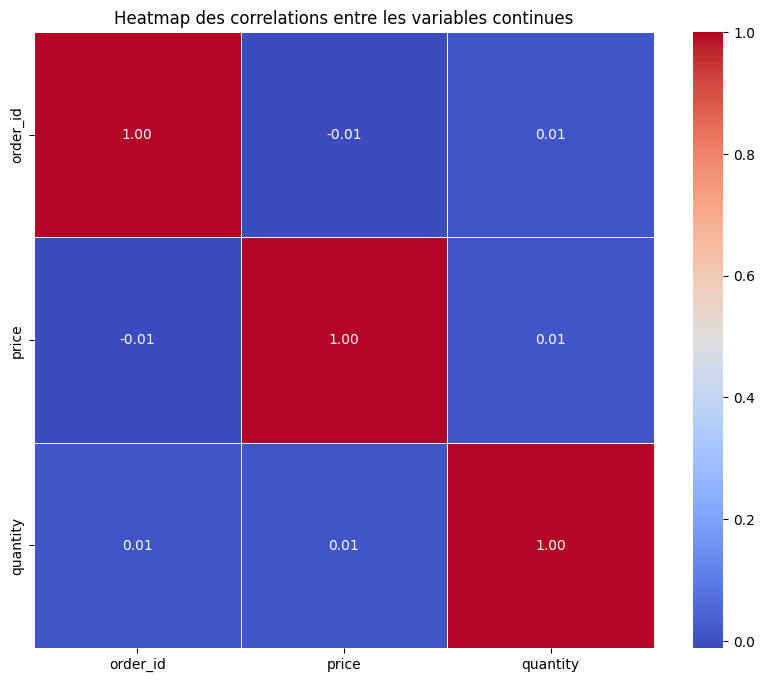

In [11]:
matrice_correlation=df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(matrice_correlation,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("Heatmap des correlations entre les variables continues")
plt.show()

Etape 5: Mise en palce de graphes pour visualiser des tendances

In [31]:
df['date']=pd.to_datetime(df['date'])


df['year']=df['date'].dt.year      # extraire l'année
df['month']=df['date'].dt.month     # le mois
df['day']=df['date'].dt.day
df['weekday']=df['date'].dt.weekday   

print(df['month'].unique())


[ 1 11 12  4  5  2  3]
['P043' 'P048' 'P030' 'P031' 'P049' 'P028' 'P045' 'P014' 'P022' 'P009'
 'P033' 'P042' 'P021' 'P025' 'P023' 'P017' 'P010' 'P007' 'P001' 'P029'
 'P006' 'P002' 'P013' 'P015' 'P024' 'P016' 'P027' 'P038' 'P036' 'P012'
 'P037' 'P005' 'P035' 'P032' 'P011' 'P003' 'P019' 'P046' 'P026' 'P034'
 'P004' 'P047' 'P008' 'P044' 'P041' 'P018' 'P040' 'P039' 'P020' 'P050']


In [ ]:
Analyse des graphes

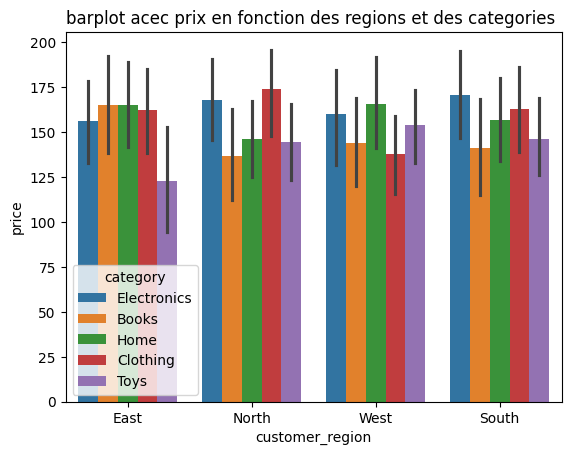

In [18]:
sns.barplot(data=df,x='customer_region',y='price',hue='category')
plt.title("barplot avec prix en fonction des regions et des categories ")
plt.show()

In [22]:
print(df.groupby(["customer_region","category"])["price"].mean())

df["price"].mean()

customer_region  category   
East             Books          164.920638
                 Clothing       162.373860
                 Electronics    156.129074
                 Home           164.801765
                 Toys           122.834167
North            Books          136.513061
                 Clothing       174.039184
                 Electronics    167.782830
                 Home           146.028036
                 Toys           144.283621
South            Books          141.133673
                 Clothing       162.722093
                 Electronics    170.897838
                 Home           156.676596
                 Toys           146.298302
West             Books          143.859216
                 Clothing       137.917241
                 Electronics    160.070192
                 Home           165.636667
                 Toys           153.954615
Name: price, dtype: float64


153.88934000000003

On en conclu que les gens dans l'est n'achete pas des jouets très chère, ou les jouets dans l'est sont vendu moins chère. Il faudrait regarder si plus de jouets sont vendus dans l'est ou non ? 

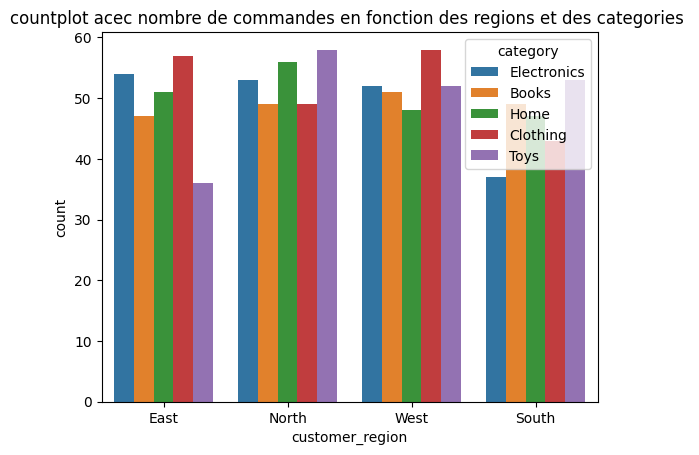

In [48]:
sns.countplot(data=df,x='customer_region',hue='category')
plt.title("countplot acec nombre de commandes en fonction des regions et des categories ")
plt.show()

les personnes n'achètent pas dans l'est ou avec des prix qui sont très bas. Maintenant on va s'intéresser au temps. 

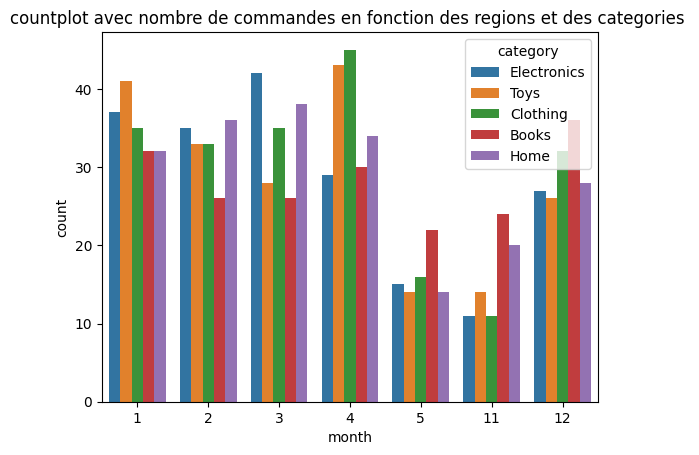

In [47]:
sns.countplot(data=df,x='month',hue='category')
plt.title("countplot avec nombre de commandes en fonction des regions et des categories ")
plt.show()

Il nous manque beaucoup de données donc, je ne peux pas interpreter grand chose, a part une baisse drastique au niveau des ventes au mois 5.

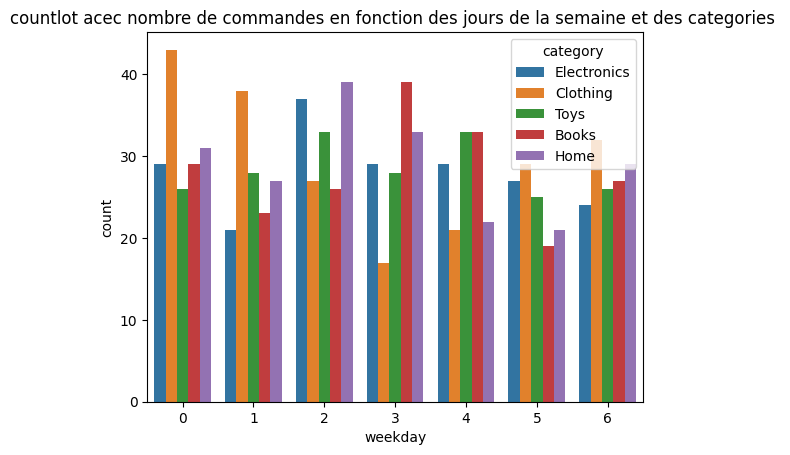

In [46]:
sns.countplot(data=df,x='weekday',hue='category')
plt.title("countlot acec nombre de commandes en fonction des jours de la semaine et des categories ")
plt.show()

Le lundi Enormement de personne achète des vêtements

In [37]:
pd.set_option('display.max_rows', None)
df.groupby(["customer_region","weekday","category"])["quantity"].sum()


customer_region  weekday  category   
East             0        Books          14
                          Clothing       41
                          Electronics    22
                          Home           27
                          Toys            2
                 1        Books          21
                          Clothing       29
                          Electronics    18
                          Home           25
                          Toys           20
                 2        Books          15
                          Clothing       21
                          Electronics    30
                          Home           35
                          Toys            9
                 3        Books          30
                          Clothing       17
                          Electronics    14
                          Home           27
                          Toys           26
                 4        Books          20
                          Clothing    

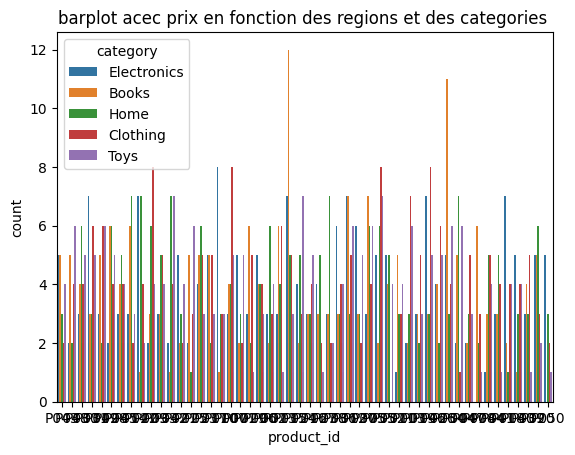

In [38]:
sns.countplot(data=df,x='product_id',hue='category')
plt.title("barplot avec nombre de commande du produit en fonction des categories et des ID ")
plt.show()

Les produits lse plus vendus sont des livres, mais quel livres ? Et un vetement en particulier. 

In [41]:
df['product_id'].value_counts()
print(df[df['product_id'] == 'P015'])

     order_id       date product_id     category   price  quantity  \
34         35 2025-03-12       P015  Electronics  239.03         5   
57         58 2024-12-19       P015     Clothing  197.85         5   
190       191 2025-04-16       P015         Home  149.31         5   
247       248 2024-12-12       P015  Electronics  298.23         5   
270       271 2024-12-28       P015     Clothing  167.68         5   
278       279 2025-01-12       P015         Toys   45.80         5   
318       319 2025-03-20       P015  Electronics  299.84         1   
336       337 2025-05-05       P015         Toys  142.76         3   
337       338 2025-04-21       P015  Electronics  290.69         3   
341       342 2024-12-22       P015        Books  204.74         1   
344       345 2025-01-22       P015         Home   42.62         1   
371       372 2025-04-20       P015         Toys  137.67         1   
384       385 2025-03-16       P015         Home   92.25         4   
399       400 2024-1

On remarque qu'il y a un problème, les products ID peuvent être les mêmes pour des categories différentes.

In [43]:
df.groupby(["category","product_id"])["quantity"].sum()

category     product_id
Books        P001           3
             P002           7
             P003          10
             P004          16
             P005          23
             P006           8
             P007          17
             P008          15
             P009           9
             P010           3
             P011          15
             P012          24
             P013          15
             P014          19
             P015          37
             P016          12
             P017          15
             P018           6
             P019          13
             P020          15
             P021           7
             P022           1
             P023          15
             P024          10
             P025          14
             P026          18
             P027          11
             P028          21
             P029          17
             P030          11
             P031           8
             P032          15
             P03

Donc produit le plus vendu : P015 dans les livres : 37 ventes (aussi le livre le plus commandé)